In [1]:
#!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [2]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

fatal: destination path 'SRCNN-Keras' already exists and is not an empty directory.


In [3]:
cd SRCNN-Keras/

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE\SRCNN-Keras


In [4]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [5]:
!unzip yang91.zip

unzip:  cannot find or open yang91.zip, yang91.zip.zip or yang91.zip.ZIP.


In [6]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [7]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [8]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [9]:
cd ..

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE


In [10]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SHALLOW_BRANCH.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [11]:
!unzip "DIV2K_train_HR.zip"

unzip:  cannot find or open DIV2K_train_HR.zip, DIV2K_train_HR.zip.zip or DIV2K_train_HR.zip.ZIP.


In [12]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [13]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SHALLOW_BRANCH.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [14]:
DATADIR = "SRCNN-Keras/yang91"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"

In [15]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
#from google.colab.patches import cv2_imshow
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, add, Activation, LeakyReLU

In [16]:
scale = 2
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
    readpath = os.path.join(DATADIR,filera)
    img = cv2.imread(readpath)
    img = np.asarray(img)
    shapes = img.shape
    for i in range(0, shapes[0]-req_size+1, stride):
        for j in range(0, shapes[1]-req_size+1,stride):
            subimage_HR = img[i:i+req_size, j:j+req_size]
            #cv2_imshow(subimage_HR)
            subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
            X.append(subimage_LR)
            labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
    counta=counta+1
    if(counta==300):
        break
        readpath = os.path.join(DATADIR2,filera)
        img = cv2.imread(readpath)
        img = np.asarray(img)
        shapes = img.shape
        for i in range(0, shapes[0]-req_size+1, stride):
            for j in range(0, shapes[1]-req_size+1,stride):
                subimage_HR = img[i:i+req_size, j:j+req_size]
                #cv2_imshow(subimage_HR)
                subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
                X.append(subimage_LR)
                labels.append(subimage_HR)

In [17]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(18849, 20, 20, 3)
(18849, 10, 10, 3)


In [18]:
alpha = 0.85
def basic_mse(y_true, y_pred):
    pred = tf.image.sobel_edges(y_pred)
    true = tf.image.sobel_edges(y_true)
    lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
    lossedge = tf.reduce_mean(tf.square(pred-true))
    return alpha*lossmse + (1-alpha)*lossedge

In [19]:
from tensorflow.keras.layers import Input, Conv2D, Activation, SeparableConv2D
from tensorflow.keras.layers import PReLU

In [20]:
from keras.layers.advanced_activations import PReLU

In [21]:
def Shallow_Block():
    _input = Input(shape=(None, None, 3))
    DC = SeparableConv2D(3,(3,3),padding='SAME')(_input)
    PRS1 = PReLU(shared_axes=[1,2])(DC)
    DC1 = SeparableConv2D(32,(1,1),padding='SAME')(PRS1)
    PRS2 = PReLU(shared_axes=[1,2])(DC1)
    #UShallow = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(PRS2)
    DC2 = SeparableConv2D(3,(1,1),padding='SAME')(PRS2)
    PRS3 = PReLU(shared_axes=[1,2])(DC2)
    Shallow = Model(inputs=_input, outputs=PRS3)
    return Shallow
model = Shallow_Block()

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 separable_conv2d (Separable  (None, None, None, 3)    39        
 Conv2D)                                                         
                                                                 
 p_re_lu (PReLU)             (None, None, None, 3)     3         
                                                                 
 separable_conv2d_1 (Separab  (None, None, None, 32)   131       
 leConv2D)                                                       
                                                                 
 p_re_lu_1 (PReLU)           (None, None, None, 32)    32        
                                                                 
 separable_conv2d_2 (Separab  (None, None, None, 3)    131   

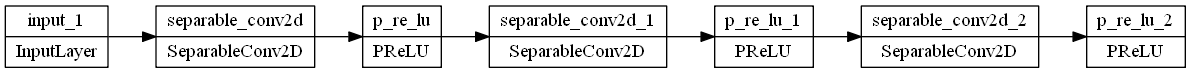

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [24]:
def Shallow_Network():
    inputlayer = tf.keras.layers.Input(shape=(None,None,3))
    DCD1 = SeparableConv2D(3,(3,3),padding='SAME')(inputlayer)
    PRD1 = PReLU(shared_axes=[1,2])(DCD1)
    STCAB1 = Shallow_Block()(PRD1)
    STCAB2 = Shallow_Block()(STCAB1)
    STCAB3 = Shallow_Block()(STCAB2)
    STCAB4 = Shallow_Block()(STCAB3)
    UDeep = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)( STCAB4)
    DCD4 = SeparableConv2D(3,(1,1),padding='SAME')(UDeep)
    PRD4 = PReLU(shared_axes=[1,2])(DCD4)
    model = Model(inputs=inputlayer, outputs=PRD4)
    return model
model = Shallow_Network() 

In [25]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]
[None, None, None, 3]


In [26]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 separable_conv2d_3 (Separab  (None, None, None, 3)    39        
 leConv2D)                                                       
                                                                 
 p_re_lu_3 (PReLU)           (None, None, None, 3)     3         
                                                                 
 model_1 (Functional)        (None, None, None, 3)     339       
                                                                 
 model_2 (Functional)        (None, None, None, 3)     339       
                                                                 
 model_3 (Functional)        (None, None, None, 3)     339       
                                                           

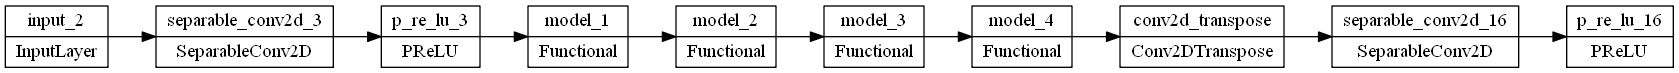

In [27]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [28]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 separable_conv2d_3 (Separab  (None, None, None, 3)    39        
 leConv2D)                                                       
                                                                 
 p_re_lu_3 (PReLU)           (None, None, None, 3)     3         
                                                                 
 model_1 (Functional)        (None, None, None, 3)     339       
                                                                 
 model_2 (Functional)        (None, None, None, 3)     339       
                                                                 
 model_3 (Functional)        (None, None, None, 3)     339       
                                                           

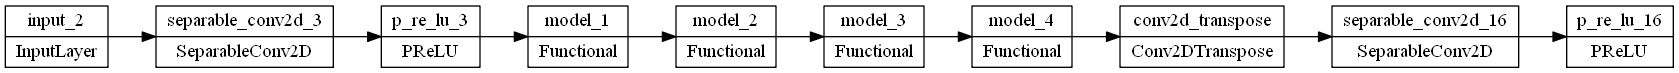

In [29]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [30]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
history = model.fit(X,labels,batch_size=32,shuffle=True,validation_split=0.01 ,epochs=5,callbacks=[checkpoint],
                    verbose=1 )

Epoch 1/5
584/584 [==============================] - 15s 16ms/step - loss: 6047.1016 - accuracy: 0.6807 - val_loss: 3039.4431 - val_accuracy: 1.0000
Epoch 2/5
584/584 [==============================] - 9s 15ms/step - loss: 2376.2820 - accuracy: 0.6813 - val_loss: 1684.5298 - val_accuracy: 1.0000
Epoch 3/5
584/584 [==============================] - 9s 16ms/step - loss: 1715.7693 - accuracy: 0.6813 - val_loss: 1512.1902 - val_accuracy: 1.0000- loss: 1721.1975 - accu
Epoch 4/5
179/584 [========>.....................] - ETA: 6s - loss: 1636.2736 - accuracy: 0.6787

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def psnr_calc():
    testimg = []
    GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
    GT = np.asarray(GT)
    h = GT.shape[0]
    l = GT.shape[1]
    img1 = cv2.resize(GT,(int(l/2),int(h/2)),interpolation = cv2.INTER_CUBIC)
    img1 = np.asarray(img1)
    testimg.append(img1)
    testimg = np.asarray(testimg)
    print(testimg.shape)
    fin =(model.predict(testimg)[0])
    inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
    GT = GT[0:fin.shape[0],0:fin.shape[1],:]
    mse = np.square(np.subtract(GT, fin)).mean()
    #cv2_imshow(inp)
    #cv2_imshow(fin)
    #cv2_imshow(GT)
    import math
    psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
    return psnr

In [ ]:
ps1 = psnr_calc()
print(ps1)

In [ ]:
#35.27103087889881

In [ ]:
model.save("model2_FCN_FSRCNN.h5")